<a href="https://colab.research.google.com/github/Bingurrr/data_science/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EA%B3%BC%ED%95%99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
!ls "/content/gdrive/My Drive/movielens"

allbut.pl  u1.base  u2.test  u4.base  u5.test  ub.base	u.genre  u.occupation
mku.sh	   u1.test  u3.base  u4.test  ua.base  ub.test	u.info	 u.user
README	   u2.base  u3.test  u5.base  ua.test  u.data	u.item


In [3]:
import torch
import pandas as pd
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [4]:
train = pd.read_csv("/content/gdrive/MyDrive/movielens/ua.base", sep ="\t",
            names=["user", "item","rating","timestamp"])

test = pd.read_csv("/content/gdrive/MyDrive/movielens/ua.test", sep ="\t",
            names=["user", "item","rating","timestamp"])

In [5]:
users = torch.LongTensor(train['user'])
items = torch.LongTensor(train['item'])
ratings = torch.FloatTensor(train['rating'])


users_test = torch.LongTensor(test['user'])
items_test = torch.LongTensor(test['item'])
ratings_test = torch.FloatTensor(test['rating'])

In [11]:
rank = 10
num_users = users.max() + 1
num_items = items.max() + 1

P = torch.randn(num_users, rank, requires_grad = True)
Q = torch.randn(num_items, rank, requires_grad = True)


optimizer = torch.optim.Adam([P, Q], lr= 0.1)

for epoch in range(1001):
  hypo = (P[users] * Q[items]).sum(dim=1)
  cost = F.mse_loss(hypo, ratings) 

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  with torch.no_grad():
    if epoch % 100 == 0:
      print(f"epoch: {epoch}, cost: {cost.item()}")



epoch: 0, cost: 23.77887535095215
epoch: 100, cost: 0.5666452050209045
epoch: 200, cost: 0.4953190088272095
epoch: 300, cost: 0.47204914689064026
epoch: 400, cost: 0.46189364790916443
epoch: 500, cost: 0.4559664726257324
epoch: 600, cost: 0.45194220542907715
epoch: 700, cost: 0.44918757677078247
epoch: 800, cost: 0.4472704529762268
epoch: 900, cost: 0.44590726494789124
epoch: 1000, cost: 0.44482359290122986


In [21]:
users = torch.LongTensor(train['user'])
items = torch.LongTensor(train['item'])
ratings = torch.FloatTensor(train['rating'])


users_test = torch.LongTensor(test['user'])
items_test = torch.LongTensor(test['item'])
ratings_test = torch.FloatTensor(test['rating'])

rank = 10
num_users = users.max() + 1
num_items = items.max() + 1

P = torch.randn(num_users, rank, requires_grad = True)
Q = torch.randn(num_items, rank, requires_grad = True)

X = []
Y = []

optimizer = torch.optim.Adam([P, Q], lr= 0.5)


for epoch in range(1001):
  hypo = (P[users] * Q[items]).sum(dim=1)
  cost = F.mse_loss(hypo, ratings) 

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  with torch.no_grad():
    X.append(epoch)
    Y.append(cost.item())

    if epoch % 100 == 0:
      print(f"epoch: {epoch}, cost: {cost.item()}")

epoch: 0, cost: 23.72408103942871
epoch: 100, cost: 0.4786898195743561
epoch: 200, cost: 0.45395344495773315
epoch: 300, cost: 0.44815793633461
epoch: 400, cost: 0.4452133774757385
epoch: 500, cost: 0.44340604543685913
epoch: 600, cost: 0.44334056973457336
epoch: 700, cost: 0.44139599800109863
epoch: 800, cost: 0.44232749938964844
epoch: 900, cost: 0.4434596598148346
epoch: 1000, cost: 0.44054746627807617


In [22]:
#print(X)
print(Y)

[23.72408103942871, 14.859870910644531, 12.104571342468262, 8.485879898071289, 4.883877277374268, 5.797087669372559, 3.899087429046631, 2.8824193477630615, 3.5316390991210938, 3.7157349586486816, 3.030811071395874, 2.135629653930664, 1.819395899772644, 2.004429340362549, 1.8826457262039185, 1.5645538568496704, 1.5299644470214844, 1.6278979778289795, 1.562227725982666, 1.3380810022354126, 1.1697683334350586, 1.1653642654418945, 1.1738123893737793, 1.0849910974502563, 1.008640170097351, 1.0099787712097168, 1.0081571340560913, 0.9444032311439514, 0.8709238767623901, 0.8536802530288696, 0.8608934879302979, 0.8297356367111206, 0.78266441822052, 0.768531858921051, 0.7708552479743958, 0.751607358455658, 0.718153178691864, 0.7013481259346008, 0.6983797550201416, 0.6842163801193237, 0.66303551197052, 0.6533344984054565, 0.6497051119804382, 0.6376517415046692, 0.6219084858894348, 0.6143624186515808, 0.6100446581840515, 0.5997627973556519, 0.5893908143043518, 0.5854037404060364, 0.581446468830108

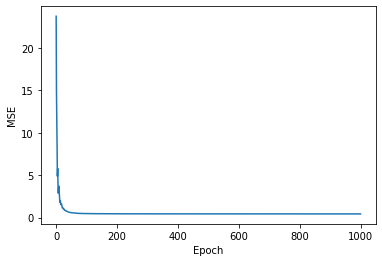

In [25]:
plt.plot(X,Y)
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.show()

In [29]:
users = torch.LongTensor(train['user'])
items = torch.LongTensor(train['item'])
ratings = torch.FloatTensor(train['rating'])


users_test = torch.LongTensor(test['user'])
items_test = torch.LongTensor(test['item'])
ratings_test = torch.FloatTensor(test['rating'])

rank = 10
num_users = users.max() + 1
num_items = items.max() + 1

P = torch.randn(num_users, rank, requires_grad = True)
Q = torch.randn(num_items, rank, requires_grad = True)

X = []
Y = []
Y_test = []

optimizer = torch.optim.Adam([P, Q], lr= 0.1)


for epoch in range(1001):
  hypo = (P[users] * Q[items]).sum(dim=1)
  cost = F.mse_loss(hypo, ratings) 

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  with torch.no_grad():
    X.append(epoch)
    Y.append(cost.item())

    hypo_test = (P[users_test] * Q[items_test]).sum(dim=1)
    cost_test = F.mse_loss(hypo_test, ratings_test)
    Y_test.append(cost_test.item())

    if epoch % 100 == 0:
      print(f"epoch: {epoch}, cost: {cost.item()}, cost_test: {cost_test.item()}")

epoch: 0, cost: 23.14137077331543, cost_test: 21.970714569091797
epoch: 100, cost: 0.5629144906997681, cost_test: 1.4571787118911743
epoch: 200, cost: 0.4916103482246399, cost_test: 1.796599268913269
epoch: 300, cost: 0.46933379769325256, cost_test: 2.095024824142456
epoch: 400, cost: 0.45945611596107483, cost_test: 2.441206455230713
epoch: 500, cost: 0.4536813795566559, cost_test: 2.8237593173980713
epoch: 600, cost: 0.4500119984149933, cost_test: 3.265096426010132
epoch: 700, cost: 0.44765642285346985, cost_test: 3.7488794326782227
epoch: 800, cost: 0.44595426321029663, cost_test: 4.277623176574707
epoch: 900, cost: 0.44454601407051086, cost_test: 4.865095138549805
epoch: 1000, cost: 0.4433070719242096, cost_test: 5.525461673736572


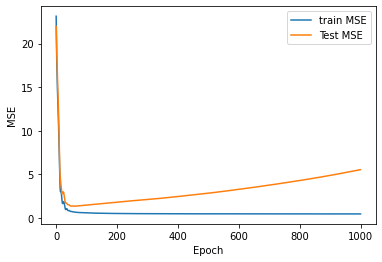

In [31]:
# plt.plot(X,Y)
plt.xlabel("Epoch")
plt.ylabel("MSE")

plt.plot(X,Y, label="train MSE")
plt.plot(X,Y_test, label = "Test MSE") # overfiting
plt.legend()

plt.show()

In [36]:
users = torch.LongTensor(train['user'])
items = torch.LongTensor(train['item'])
ratings = torch.FloatTensor(train['rating'])

users_test = torch.LongTensor(test['user'])
items_test = torch.LongTensor(test['item'])
ratings_test = torch.FloatTensor(test['rating'])


rank = 10
num_users = users.max() + 1
num_items = items.max() + 1

P = torch.randn(num_users, rank, requires_grad = True)
Q = torch.randn(num_items, rank, requires_grad = True)

X = []
Y = []
Y_test = []

optimizer = torch.optim.Adam([P, Q], lr= 0.1)

#  Regularization 정규화 : 오버피팅 해결
# weight
lambda_P = 0.0001
lambda_Q = 0.0001

for epoch in range(1001):
  hypo = (P[users] * Q[items]).sum(dim=1)
  mse = F.mse_loss(hypo, ratings) 
  cost = mse + lambda_P*(P**2).sum() + lambda_Q*(Q**2).sum() # 얼마만큼 중요하게 볼건지

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  with torch.no_grad():
    X.append(epoch)
    Y.append(cost.item())

    hypo_test = (P[users_test] * Q[items_test]).sum(dim=1)
    mse_test = F.mse_loss(hypo_test, ratings_test)
    Y_test.append(mse_test.item())

    if epoch % 100 == 0:
      print(f"epoch: {epoch}, mse: {mse.item()}, mse_test: {mse_test.item()}")




epoch: 0, mse: 23.636741638183594, mse_test: 22.04698371887207
epoch: 100, mse: 0.6963827610015869, mse_test: 1.0564223527908325
epoch: 200, mse: 0.6420204639434814, mse_test: 1.060447096824646
epoch: 300, mse: 0.6318362355232239, mse_test: 1.0606387853622437
epoch: 400, mse: 0.6291473507881165, mse_test: 1.0579414367675781
epoch: 500, mse: 0.628076434135437, mse_test: 1.0563591718673706
epoch: 600, mse: 0.6274358034133911, mse_test: 1.0554345846176147
epoch: 700, mse: 0.6269446015357971, mse_test: 1.054823398590088
epoch: 800, mse: 0.6265445947647095, mse_test: 1.0546941757202148
epoch: 900, mse: 0.626262903213501, mse_test: 1.0550364255905151
epoch: 1000, mse: 0.6261125802993774, mse_test: 1.0554835796356201


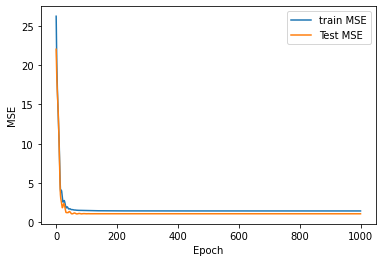

In [37]:
# plt.plot(X,Y)
plt.xlabel("Epoch")
plt.ylabel("MSE")

plt.plot(X,Y, label="train MSE")
plt.plot(X,Y_test, label = "Test MSE") # overfiting
plt.legend()

plt.show()

In [47]:
users = torch.LongTensor(train['user'])
items = torch.LongTensor(train['item'])
ratings = torch.FloatTensor(train['rating'])

users_test = torch.LongTensor(test['user'])
items_test = torch.LongTensor(test['item'])
ratings_test = torch.FloatTensor(test['rating'])


rank = 10
num_users = users.max() + 1
num_items = items.max() + 1

P = torch.randn(num_users, rank, requires_grad = True)
Q = torch.randn(num_items, rank, requires_grad = True)

X = []
Y = []
Y_test = []


#  Regularization 정규화 : 오버피팅 해결
# weight
lambda_P = 0.0001
lambda_Q = 0.0001
lambda_BU = 0.0001
lambda_BI = 0.0001


#bias

bias_user = torch.randn(num_users, requires_grad = True)
bias_item = torch.randn(num_items, requires_grad = True)
mean = (ratings.sum()/len(ratings)).item()

# bias_user, bias_item도 학습
optimizer = torch.optim.Adam([P, Q, bias_user, bias_item], lr =0.1)


for epoch in range(1001):
  # 예상 별점
  hypo = (P[users] * Q[items]).sum(dim=1) + bias_user[users] + bias_item[items] + mean
  mse = F.mse_loss(hypo, ratings) 
  cost = mse + lambda_P*(P**2).sum() + lambda_Q*(Q**2).sum() + lambda_BU * (bias_user**2).sum() + lambda_BI * (bias_item**2).sum() # 얼마만큼 중요하게 볼건지

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  with torch.no_grad():
    X.append(epoch)
    Y.append(cost.item())

    hypo_test = (P[users_test] * Q[items_test]).sum(dim=1) + bias_user[users_test] + bias_item[items_test] + mean
    mse_test = F.mse_loss(hypo_test, ratings_test)
    Y_test.append(mse_test.item())

    if epoch % 100 == 0:
      print(f"epoch: {epoch}, mse: {mse.item()}, mse_test: {mse_test.item()}")

## 오버피팅 문제 해결 mse_test가 내려갔다가 잘 정착
## bias를 넣어서 성능을 더 증가 할 수 있다.
## 어떤 유저, 어떤 영화 -> 예측 성능 보완 -> bias를 구해서 얼마나 인기있는지 생각
## 치우친 정도(bias) + 전체적인 평균


## 데이터가 부족한 것도 학습이 잘된다.

epoch: 0, mse: 13.34118938446045, mse_test: 10.390522003173828
epoch: 100, mse: 0.6125866770744324, mse_test: 0.8805272579193115
epoch: 200, mse: 0.5827552080154419, mse_test: 0.8769081830978394
epoch: 300, mse: 0.5774008631706238, mse_test: 0.8752919435501099
epoch: 400, mse: 0.575313925743103, mse_test: 0.872830331325531
epoch: 500, mse: 0.5741400122642517, mse_test: 0.8716549277305603
epoch: 600, mse: 0.5732702612876892, mse_test: 0.8705556392669678
epoch: 700, mse: 0.5729602575302124, mse_test: 0.8696010708808899
epoch: 800, mse: 0.5728998184204102, mse_test: 0.8683965802192688
epoch: 900, mse: 0.5729036927223206, mse_test: 0.8672972917556763
epoch: 1000, mse: 0.5728442668914795, mse_test: 0.8665609955787659


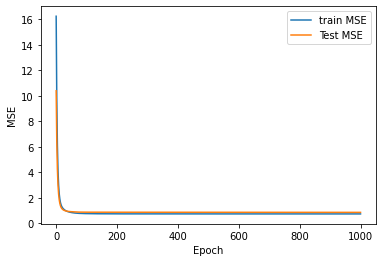

In [48]:
# plt.plot(X,Y)
plt.xlabel("Epoch")
plt.ylabel("MSE")

plt.plot(X,Y, label="train MSE")
plt.plot(X,Y_test, label = "Test MSE") # overfiting
plt.legend()

plt.show()

In [75]:
rank = 10
num_users = users.max() + 1
num_items = items.max() + 1

P = torch.randn(num_users, rank, requires_grad = True)
Q = torch.randn(num_items, rank, requires_grad = True)

X = []
Y = []
Y_test = []


#  Regularization 정규화 : 오버피팅 해결
# weight

lambda_P = 0.0001
lambda_Q = 0.0001
lambda_BU = 0.00005
lambda_BI = 0.00005

#bias

bias_user = torch.randn(num_users, requires_grad = True)
bias_item = torch.randn(num_items, requires_grad = True)
mean = (ratings.sum()/len(ratings)).item()

# bias_user, bias_item도 학습
optimizer = torch.optim.Adam([P, Q, bias_user, bias_item], lr =0.1)


for epoch in range(1001):
  # 예상 별점
  hypo = (P[users] * Q[items]).sum(dim=1) + bias_user[users] + bias_item[items] + mean
  mse = F.mse_loss(hypo, ratings) 
  cost = mse + lambda_P*(P**2).sum() + lambda_Q*(Q**2).sum() + lambda_BU * (bias_user**2).sum() + lambda_BI * (bias_item**2).sum() # 얼마만큼 중요하게 볼건지

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  with torch.no_grad():
    X.append(epoch)
    Y.append(cost.item())

    hypo_test = (P[users_test] * Q[items_test]).sum(dim=1) + bias_user[users_test] + bias_item[items_test] + mean
    mse_test = F.mse_loss(hypo_test, ratings_test)
    Y_test.append(mse_test.item())

    if epoch % 100 == 0:
      print(f"epoch: {epoch}, mse: {mse.item()}, mse_test: {mse_test.item()}")

epoch: 0, mse: 12.9318265914917, mse_test: 9.811745643615723
epoch: 100, mse: 0.6006867289543152, mse_test: 0.8761255741119385
epoch: 200, mse: 0.5740607976913452, mse_test: 0.8695313334465027
epoch: 300, mse: 0.5701763033866882, mse_test: 0.8659879565238953
epoch: 400, mse: 0.5688702464103699, mse_test: 0.8629978895187378
epoch: 500, mse: 0.5683128237724304, mse_test: 0.8617913722991943
epoch: 600, mse: 0.568158745765686, mse_test: 0.8615835905075073
epoch: 700, mse: 0.568122386932373, mse_test: 0.8615716695785522
epoch: 800, mse: 0.5681065320968628, mse_test: 0.8615303635597229
epoch: 900, mse: 0.5680898427963257, mse_test: 0.8614932298660278
epoch: 1000, mse: 0.5680724382400513, mse_test: 0.8615032434463501
